In [1]:
import sys
import os

# Get the path to src/ relative to this notebook
notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

# Add to Python path if not already there
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from utils.chelsa import extract_param
from datasource.chelsa import s3, layer, sampling

# Generate CHELSA cube

In [2]:
param_file = "prototype_param.yaml"
chelsa_month_param = extract_param.read_chelsa_month_param(param_file, param_path = "../../config")
chelsa_ref_period_param = extract_param.read_chelsa_clim_ref_period_param(param_file, param_path = "../../config")
chelsa_ref_month_param = extract_param.read_chelsa_clim_ref_month_param(param_file, param_path = "../../config")
chelsa_clim_period_param = extract_param.read_chelsa_clim_sim_period_param(param_file, param_path = "../../config")
chelsa_clim_month_param = extract_param.read_chelsa_clim_sim_month_param(param_file, param_path = "../../config")

In [3]:
def da_layer_constructor(data_layer_func, param):
    static_param = list(param.values())[1:]
    data_arrays = []
    for var in param["var"]:
        data_arrays.append(data_layer_func(var, *static_param))
    return data_arrays

In [4]:
test = da_layer_constructor(layer.chelsa_month_ts, chelsa_month_param)

-----Retrieving monthly CHELSA data for variable 'clt' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:14<00:00,  1.63item/s]


-----Retrieving monthly CHELSA data for variable 'cmi' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.49item/s]


-----Retrieving monthly CHELSA data for variable 'hurs' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43item/s]


-----Retrieving monthly CHELSA data for variable 'pet' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.52item/s]


-----Retrieving monthly CHELSA data for variable 'pr' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42item/s]


-----Retrieving monthly CHELSA data for variable 'rsds' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39item/s]


-----Retrieving monthly CHELSA data for variable 'sfcWind' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39item/s]


-----Retrieving monthly CHELSA data for variable 'tas' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.50item/s]


-----Retrieving monthly CHELSA data for variable 'tasmax' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.48item/s]


-----Retrieving monthly CHELSA data for variable 'tasmin' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39item/s]


-----Retrieving monthly CHELSA data for variable 'vpd' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.45item/s]


In [5]:
test

[('clt',
  <xarray.DataArray (time: 24, lat: 8, long: 23)>
  array([[[5152, 5154, 5162, ..., 5224, 5216, 5210],
          [5147, 5147, 5154, ..., 5206, 5217, 5215],
          [5152, 5150, 5145, ..., 5228, 5243, 5248],
          ...,
          [5162, 5153, 5149, ..., 5193, 5206, 5228],
          [5169, 5149, 5166, ..., 5204, 5224, 5280],
          [5168, 5155, 5162, ..., 5220, 5249, 5298]],
  
         [[6264, 6268, 6267, ..., 6225, 6220, 6203],
          [6239, 6247, 6256, ..., 6163, 6185, 6190],
          [6262, 6256, 6254, ..., 6232, 6251, 6260],
          ...,
          [6255, 6254, 6270, ..., 6205, 6230, 6297],
          [6232, 6250, 6288, ..., 6223, 6292, 6416],
          [6257, 6257, 6266, ..., 6278, 6371, 6461]],
  
         [[6139, 6139, 6142, ..., 6138, 6145, 6150],
          [6117, 6116, 6119, ..., 6123, 6140, 6145],
          [6109, 6102, 6099, ..., 6159, 6176, 6193],
          ...,
  ...
          ...,
          [5179, 5178, 5181, ..., 5036, 5039, 5054],
          [5177, 51

In [ ]:
import xarray

def regrid_interp(
    da: xr.DataArray,
    new_lats: xr.DataArray,
    new_lons: xr.DataArray,
    method: str = "linear"
) -> xr.DataArray:
    """
    Upscale or downscale by interpolating `da` onto (new_lats, new_lons).
    `method` can be "linear", "nearest", or "cubic".
    """
    # Ensure monotonic coords
    da = da.sortby(["lat", "lon"])
    return da.interp(lat=new_lats, lon=new_lons, method=method)

def reproject_array(data_array, upscaled_long, upscaled_lat, method="cubic"):
    

In [6]:
lower = test[0]
lower

('clt',
 <xarray.DataArray (time: 24, lat: 8, long: 23)>
 array([[[5152, 5154, 5162, ..., 5224, 5216, 5210],
         [5147, 5147, 5154, ..., 5206, 5217, 5215],
         [5152, 5150, 5145, ..., 5228, 5243, 5248],
         ...,
         [5162, 5153, 5149, ..., 5193, 5206, 5228],
         [5169, 5149, 5166, ..., 5204, 5224, 5280],
         [5168, 5155, 5162, ..., 5220, 5249, 5298]],
 
        [[6264, 6268, 6267, ..., 6225, 6220, 6203],
         [6239, 6247, 6256, ..., 6163, 6185, 6190],
         [6262, 6256, 6254, ..., 6232, 6251, 6260],
         ...,
         [6255, 6254, 6270, ..., 6205, 6230, 6297],
         [6232, 6250, 6288, ..., 6223, 6292, 6416],
         [6257, 6257, 6266, ..., 6278, 6371, 6461]],
 
        [[6139, 6139, 6142, ..., 6138, 6145, 6150],
         [6117, 6116, 6119, ..., 6123, 6140, 6145],
         [6109, 6102, 6099, ..., 6159, 6176, 6193],
         ...,
 ...
         ...,
         [5179, 5178, 5181, ..., 5036, 5039, 5054],
         [5177, 5179, 5191, ..., 5036, 5052,

In [10]:
test[1][1]["lat"].values

array([50.87374433, 50.865411  , 50.85707767, 50.84874433, 50.840411  ,
       50.83207767, 50.82374433, 50.815411  , 50.80707767, 50.79874433,
       50.790411  , 50.78207767, 50.77374433, 50.765411  , 50.75707767,
       50.74874433, 50.740411  , 50.73207767, 50.72374433, 50.715411  ,
       50.70707767, 50.69874433, 50.690411  ])

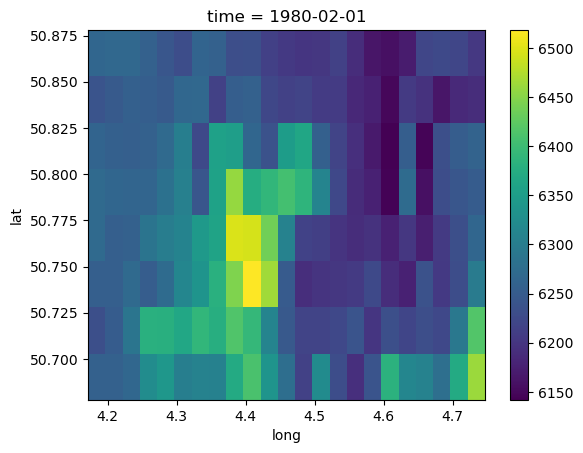

In [29]:
lower[1].sel(time="1980-02-01").plot()

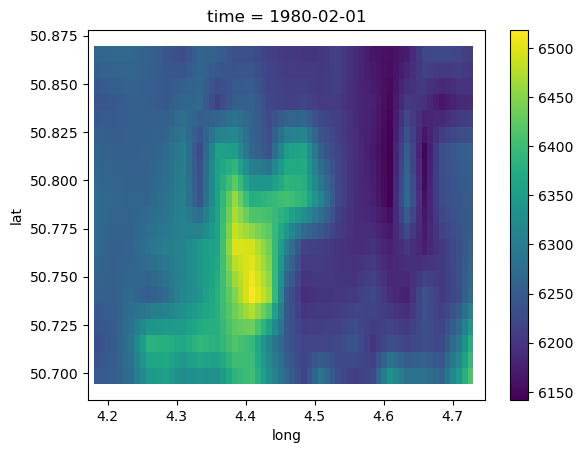

In [28]:
lower[1].interp(lat=test[1][1]["lat"].values, long=test[1][1]["long"].values, method="linear").sel(time="1980-02-01").plot()

In [14]:
clt_data = test[0][1]
clt_data.lat.values

array([50.865411  , 50.84041102, 50.81541102, 50.79041103, 50.76541105,
       50.74041105, 50.71541106, 50.69041108])

In [15]:
clt_data.long.values

array([4.18387099, 4.20887098, 4.23387097, 4.25887096, 4.28387095,
       4.30887094, 4.33387093, 4.35887092, 4.38387091, 4.4088709 ,
       4.43387089, 4.45887088, 4.48387087, 4.50887086, 4.53387085,
       4.55887084, 4.58387083, 4.60887082, 4.63387081, 4.6588708 ,
       4.68387079, 4.70887078, 4.73387077])

In [16]:
test[1][1]["lat"].values

array([50.87374433, 50.865411  , 50.85707767, 50.84874433, 50.840411  ,
       50.83207767, 50.82374433, 50.815411  , 50.80707767, 50.79874433,
       50.790411  , 50.78207767, 50.77374433, 50.765411  , 50.75707767,
       50.74874433, 50.740411  , 50.73207767, 50.72374433, 50.715411  ,
       50.70707767, 50.69874433, 50.690411  ])

In [17]:
test[1][1]["long"].values

array([4.17553767, 4.183871  , 4.19220433, 4.20053767, 4.208871  ,
       4.21720433, 4.22553767, 4.233871  , 4.24220433, 4.25053767,
       4.258871  , 4.26720433, 4.27553767, 4.283871  , 4.29220433,
       4.30053767, 4.308871  , 4.31720433, 4.32553767, 4.333871  ,
       4.34220433, 4.35053767, 4.358871  , 4.36720433, 4.37553767,
       4.383871  , 4.39220433, 4.40053767, 4.408871  , 4.41720433,
       4.42553767, 4.433871  , 4.44220433, 4.45053767, 4.458871  ,
       4.46720433, 4.47553767, 4.483871  , 4.49220433, 4.50053767,
       4.508871  , 4.51720433, 4.52553767, 4.533871  , 4.54220433,
       4.55053767, 4.558871  , 4.56720433, 4.57553767, 4.583871  ,
       4.59220433, 4.60053766, 4.608871  , 4.61720433, 4.62553766,
       4.633871  , 4.64220433, 4.65053766, 4.658871  , 4.66720433,
       4.67553766, 4.683871  , 4.69220433, 4.70053766, 4.708871  ,
       4.71720433, 4.72553766, 4.733871  , 4.74220433])